Md Redowan Amin Mollick 

Logistic Regression 

In [1]:
import numpy as np 
import pandas as pd
data_frame = pd.read_csv('/Users/mdredowanaminmollick/Downloads/mda600project/rideshare_kaggle.csv')
data_frame.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [2]:
#Checking for missing values
missing_values = data_frame.isnull().sum()

# Displaying columns with missing values and the count of missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
price    55095
dtype: int64


In [3]:
data_frame.dropna(subset=['price'], inplace=True)

In [4]:
# Checking for missing values again
missing_values = data_frame.isnull().sum()

# Displaying columns with missing values and the count of missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [6]:
# Converting the timestamp column to datetime
data_frame['timestamp'] = pd.to_datetime(data_frame['timestamp'], unit='s')

In [7]:
# Checking the unique values in the 'cab_type' column
unique_cab_types = data_frame['cab_type'].unique()
print(unique_cab_types)

['Lyft' 'Uber']


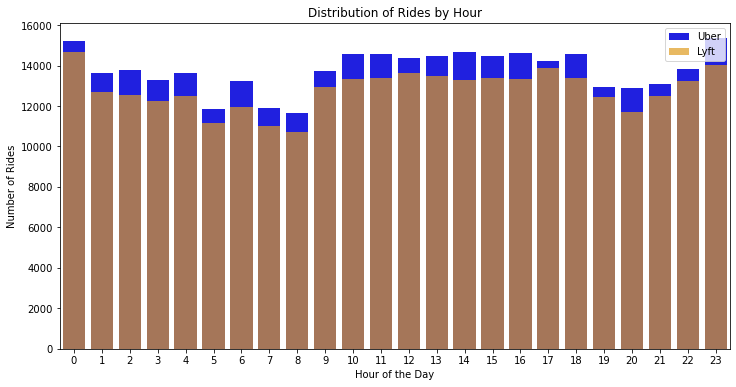

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counting rides by hour for both Uber and Lyft
hourly_counts = data_frame.groupby([data_frame['timestamp'].dt.hour, 'cab_type'])['id'].count().unstack().fillna(0)

# Creating a bar plot to visualize the distribution of rides by hour
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts['Uber'], label='Uber', color='blue')
sns.barplot(x=hourly_counts.index, y=hourly_counts['Lyft'], label='Lyft', color='orange', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Hour')
plt.legend()
plt.show()

Counting rides by Day

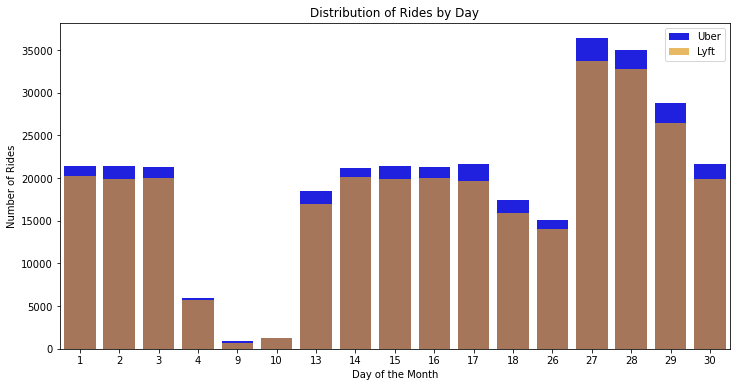

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counting rides by day for both Uber and Lyft
daily_counts = data_frame.groupby([data_frame['timestamp'].dt.day, 'cab_type'])['id'].count().unstack().fillna(0)

# Creating a bar plot to visualize the distribution of rides by day
plt.figure(figsize=(12, 6))
sns.barplot(x=daily_counts.index, y=daily_counts['Uber'], label='Uber', color='blue')
sns.barplot(x=daily_counts.index, y=daily_counts['Lyft'], label='Lyft', color='orange', alpha=0.7)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Day')
plt.legend()
plt.show()

Counting Ride by Month

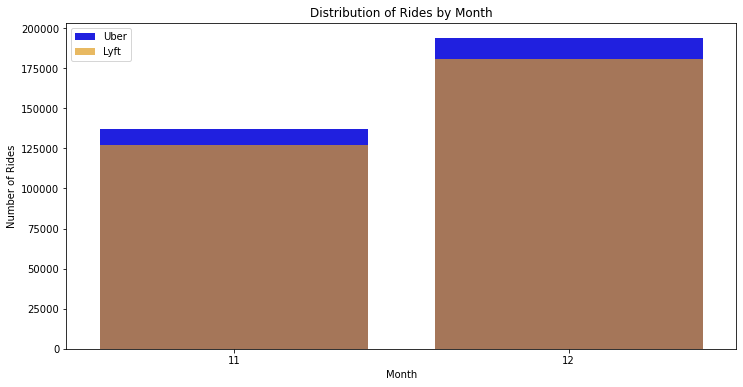

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counting rides by month for both Uber and Lyft
monthly_counts = data_frame.groupby([data_frame['timestamp'].dt.month, 'cab_type'])['id'].count().unstack().fillna(0)

# Creating a bar plot to visualize the distribution of rides by month
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts['Uber'], label='Uber', color='blue')
sns.barplot(x=monthly_counts.index, y=monthly_counts['Lyft'], label='Lyft', color='orange', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Month')
plt.legend()
plt.show()

Counting Rides by Source Location:

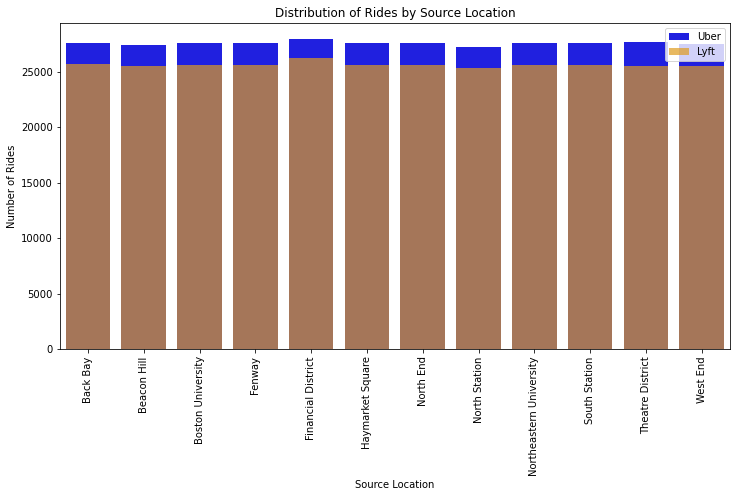

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counting rides by source location for both Uber and Lyft
source_counts = data_frame.groupby(['source', 'cab_type'])['id'].count().unstack().fillna(0)

# Creating a bar plot to visualize the distribution of rides by source location
plt.figure(figsize=(12, 6))
sns.barplot(x=source_counts.index, y=source_counts['Uber'], label='Uber', color='blue')
sns.barplot(x=source_counts.index, y=source_counts['Lyft'], label='Lyft', color='orange', alpha=0.7)
plt.xlabel('Source Location')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Source Location')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Counting Rides by Destination Location:

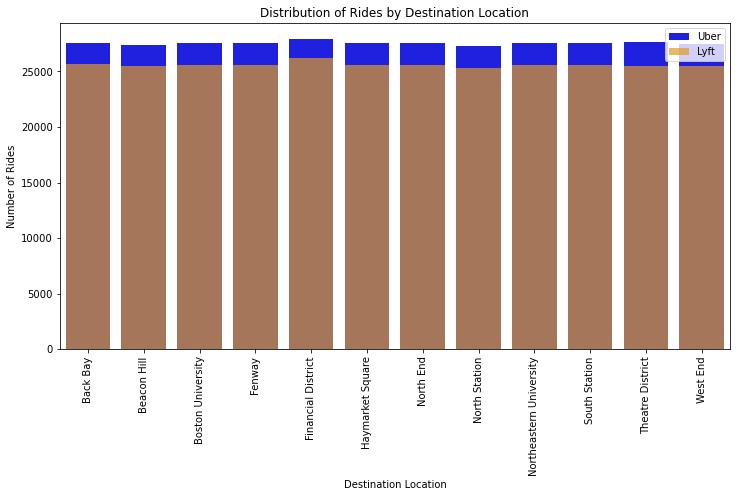

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counting rides by destination location for both Uber and Lyft
destination_counts = data_frame.groupby(['destination', 'cab_type'])['id'].count().unstack().fillna(0)

# Creating a bar plot to visualize the distribution of rides by destination location
plt.figure(figsize=(12, 6))
sns.barplot(x=destination_counts.index, y=destination_counts['Uber'], label='Uber', color='blue')
sns.barplot(x=destination_counts.index, y=destination_counts['Lyft'], label='Lyft', color='orange', alpha=0.7)
plt.xlabel('Destination Location')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Destination Location')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [13]:
# Counting the occurrences of each 'cab_type'
cab_type_counts = data_frame['cab_type'].value_counts()

# Displaying the counts and summary statistics
print("Counts of each 'cab_type':")
print(cab_type_counts)

# Calculating and display summary statistics
total_count = cab_type_counts.sum()
percentage_distribution = (cab_type_counts / total_count) * 100
summary_statistics = cab_type_counts.describe()

print("\nSummary Statistics:")
print(f"Total Count: {total_count}")
print(f"Percentage Distribution:\n{percentage_distribution}")
print("\nSummary Statistics for Count:")
print(summary_statistics)

Counts of each 'cab_type':
Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

Summary Statistics:
Total Count: 637976
Percentage Distribution:
Uber    51.815115
Lyft    48.184885
Name: cab_type, dtype: float64

Summary Statistics for Count:
count         2.000000
mean     318988.000000
std       16376.593052
min      307408.000000
25%      313198.000000
50%      318988.000000
75%      324778.000000
max      330568.000000
Name: cab_type, dtype: float64


From the analysis above, we can see that the usage of Uber is slightly higher from usage of hourly, dayly or monthly

Lets continue, on analyse the Feature Selection. Lets identify which features are most likely to impact Uber and Lyft usage in Boston. This could include variables like hour, day, month, weather conditions, or cab type. And I want to know the correlation analysis to identify relationships between features and usage.

DATA PREPARATION

In [15]:
# Selecting relevant columns for analysis
selected_columns = ['hour', 'day', 'month', 'precipIntensityMax', 'uvIndexTime',
                    'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
                    'apparentTemperatureMax', 'cab_type']

# Creating a new DataFrame with the selected columns
selected_data = data_frame[selected_columns]

# Encoding categorical variables (cab_type)
selected_data = pd.get_dummies(selected_data, columns=['cab_type'], drop_first=True)

CORRELATION ANALYSIS

In [16]:
# Calculating the correlation matrix
correlation_matrix = selected_data.corr()

# Displaying the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                            hour       day     month  precipIntensityMax  \
hour                    1.000000  0.066223 -0.079734            0.020288   
day                     0.066223  1.000000 -0.861325            0.145789   
month                  -0.079734 -0.861325  1.000000           -0.213301   
precipIntensityMax      0.020288  0.145789 -0.213301            1.000000   
uvIndexTime            -0.027997 -0.341330  0.770832           -0.209518   
temperatureMin          0.015668  0.038089 -0.191928            0.446422   
temperatureMax          0.002982 -0.304704  0.105113            0.180394   
apparentTemperatureMin  0.015882 -0.019878 -0.191293            0.409563   
apparentTemperatureMax  0.002904 -0.444366  0.214928            0.157555   
cab_type_Uber          -0.001442  0.002338 -0.001100           -0.000354   

                        uvIndexTime  temperatureMin  temperatureMax  \
hour                      -0.027997        0.015668        0.002982   
d

VISUALIZE THE CORRELATION

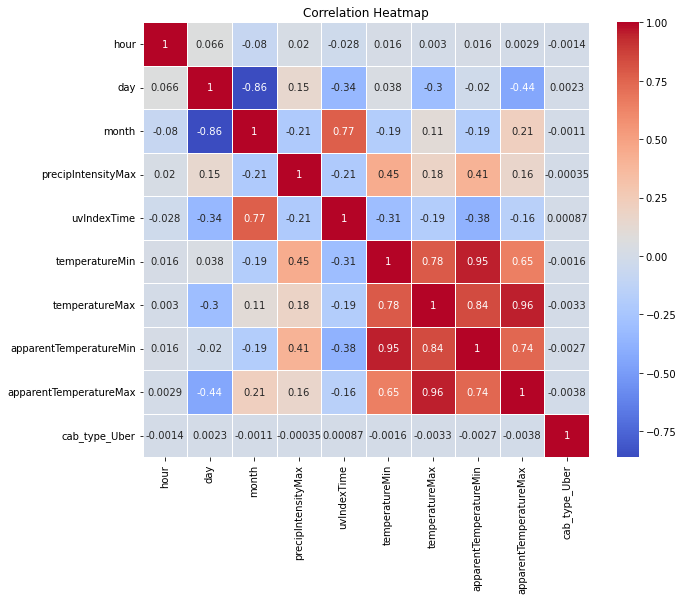

In [17]:
# Creating a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting relevant features and target variable
features = ['hour', 'day', 'month', 'precipIntensityMax', 'uvIndexTime',
            'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
            'apparentTemperatureMax']
target = 'cab_type'

# Creating a DataFrame with the selected features and target variable
data = data_frame[features + [target]]

# Encoding categorical variable 'cab_type' using one-hot encoding
data = pd.get_dummies(data, columns=[target], drop_first=True)

# Spliting the data into training and testing sets
X = data[features]
y = data['cab_type_Uber']  # Use the one-hot encoded column 'cab_type_Uber' as the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy: 0.52
Confusion Matrix:
[[    0 61339]
 [    0 66257]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     61339
           1       0.52      1.00      0.68     66257

    accuracy                           0.52    127596
   macro avg       0.26      0.50      0.34    127596
weighted avg       0.27      0.52      0.35    127596



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


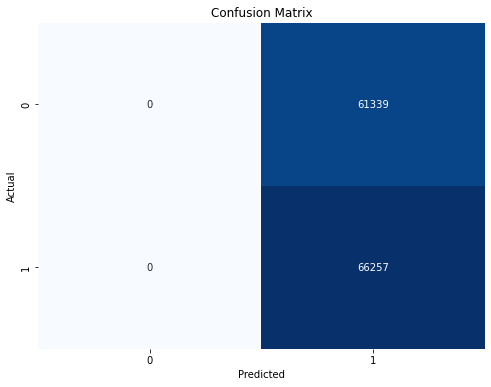

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression  # Example classifier, you can choose others
import matplotlib.pyplot as plt
import seaborn as sns

# Training a classification model
classifier = LogisticRegression(random_state=42)  # You can choose another classifier

# Fitting the classifier on the training data
classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

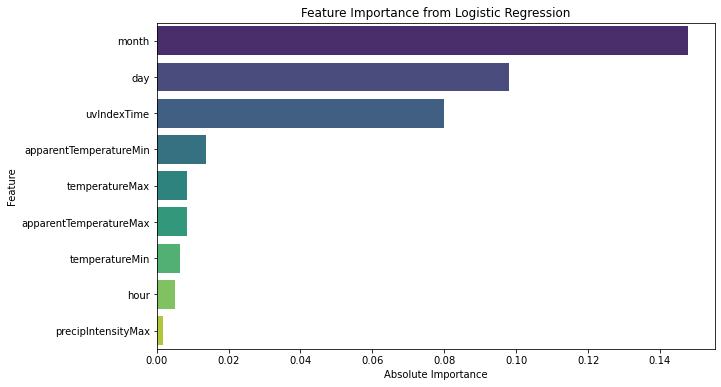

In [20]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Initializing and fit the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Getting feature coefficients (importance)
feature_importance = logistic_model.coef_[0]

# Getting the names of the features
feature_names = X.columns

# Creating a DataFrame to store feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sorting the features by their absolute importance
feature_importance_df['Absolute Importance'] = abs(feature_importance_df['Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Absolute Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.show()

The fact that the "month" feature has the highest importance score in your logistic regression model means that, according to the model, the month in which a ride occurs is a significant factor in predicting whether the ride is with Uber or Lyft. Here's how we can interpret this:

Seasonal Trends: The high importance of the "month" feature suggests that there might be strong seasonal or monthly patterns in the data. For example, people's choice of rideshare service may vary depending on the time of the year. This could be due to factors like weather conditions, holidays, or events.
Marketing or Promotions: Rideshare companies often run marketing campaigns, promotions, or discounts during specific months. Customers may be more inclined to use a particular service during months with such offers.
User Behavior: User behavior and preferences may change over the course of the year. For instance, people might be more likely to choose Uber or Lyft for different reasons in the summer compared to the winter.
Data Quality: Sometimes, high feature importance can also be an indication of data quality issues or data leakage. It's essential to ensure that the feature is genuinely informative and not the result of noise in the data.

RANDOM FOREST MODEL

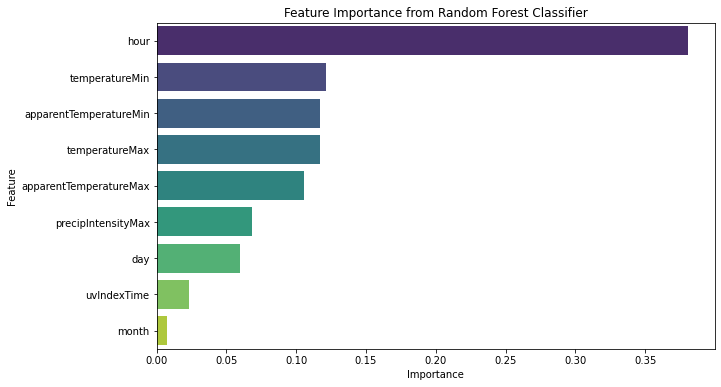

In [21]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Initializing and fit the Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Getting feature importances
feature_importance = random_forest_model.feature_importances_

# Getting the names of the features
feature_names = X.columns

# Creating a DataFrame to store feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sorting the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Classifier')
plt.show()

In [22]:
from sklearn.metrics import accuracy_score

# Making predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Printing the accuracy
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.52


From both of the model we can se that the accuracy is 0,52. Now, that we can see both of the model is on average level of accuracy.

Now, let see the hypothesis. We will need a hypothesis to test if the feature have significant impact of the usage of Uber and Lyft.

Lets try to see if Price have significant impact on the usage of Uber and Lyft

In [23]:
from scipy.stats import f_oneway
# Creating a column 'time_of_day' based on the hour of the timestamp
data_frame['time_of_day'] = pd.cut(data_frame['hour'], bins=[0, 6, 12, 18, 24], labels=['Late Night', 'Morning', 'Afternoon', 'Evening'])

# Performing a one-way ANOVA test based on 'price' across different 'cab_type' categories
f_statistic, p_value = f_oneway(*[data_frame[data_frame['cab_type'] == cab_type]['price'] for cab_type in data_frame['cab_type'].unique()])
alpha = 0.05

print(f'F-statistic: {f_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

# Checking if the p-value is less than the significance level to determine significance
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in prices among cab types.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in prices among cab types.")

F-statistic: 4466.96
p-value: 0.0000
Reject the null hypothesis: There are significant differences in prices among cab types.


Conclusion

*We already conduct some analysis to see what items that have significant effect on the usage of Uber and Lyft. We could see that there are no items that have significant effect on the usage of Uber and Lyft.

But, on the data that we receive we could see that the usage of Uber is slightly higher than Lyft. It could came from several things that not conceive in the data that we have. Like customer preference, promotion from both Uber and Lyft, or branding.*